In [2]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets


from kkmeans import KKernelClustering, k_gaussian, k_tanh
from sklearn.cluster import KMeans

# Using WSS to Find Best $K$ Value

In [3]:
n_samples = 700
blobs1 = datasets.make_blobs(n_samples=n_samples, random_state=10)
blobs2 = datasets.make_blobs(n_samples=n_samples, random_state= 3)
blobs = (np.vstack((blobs1[0], blobs2[0])), np.vstack((blobs1[1], blobs2[1])))

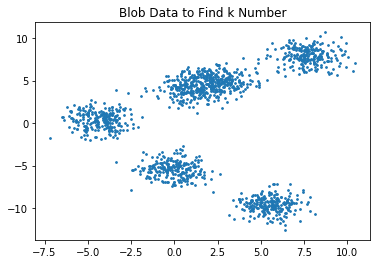

In [5]:
plt.figure()
plt.scatter(*blobs[0].T, s=3)
plt.title("Blob Data to Find k Number")
plt.show()

In [6]:
K = 10
wss_blob = np.zeros(K-1)
for k in range(1, K):
    while True:
        try:
            kc = KKernelClustering(k, 100, np.dot)
            kc.train(blobs[0])
            wss_blob[k-1] = kc._wss
            break
        except ValueError:
            print("Break at %d" % k)
            continue

c:\users\lew_e\.conda\envs\ml_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


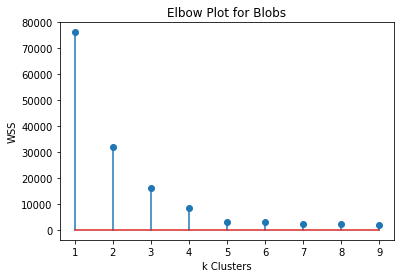

In [11]:
plt.figure()
plt.stem(np.array(range(len(wss_blob)))+1, wss_blob)
plt.title("Elbow Plot for Blobs")
plt.xlabel("k Clusters")
plt.ylabel("WSS")
plt.show()

## College Data

In [13]:
college_df = pd.read_csv("../data/College.csv")
college_df

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


Now, get data into a format that can be processed.

In [ ]:
# get data into a convenient numerical format
college = college_df.to_numpy()
X = college[:, 2:].astype(np.float)
# Get rid of 118% grad rate problem
X[X[:, 16] > 100.0, 16] = 100.0
# Store maximum values per column
A = np.tile(X.max(axis=0), reps=(X.shape[0],1))
# Scale X to normalize it
X /= np.tile(X.max(axis=0), reps=(X.shape[0],1))
X.max()

Perform kernel k-means clustering using a Gaussian kernel

In [15]:
K = 10
wss_gaussian = np.zeros(K-1)
for k in range(1, K):
    while True:
        try:
            kc = KKernelClustering(k, 100, lambda x,y: k_gaussian(x, y, 2))
            kc.train(X)
            wss_gaussian[k-1] = kc._wss
            break
        except ValueError:
            print("Break at %d" % k)
            continue

Perform kernel k-means clustering using a Linear Kernel

In [16]:
K = 10
wss_linear = np.zeros(K-1)
for k in range(1, K):
    while True:
        try:
            kc = KKernelClustering(k, 100, lambda x,y: np.dot(x, y))
            kc.train(X)
            wss_linear[k-1] = kc._wss
            break
        except ValueError:
            print("Break at %d" % k)
            continue

c:\users\lew_e\.conda\envs\ml_env\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\lew_e\.conda\envs\ml_env\lib\site-packages\ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


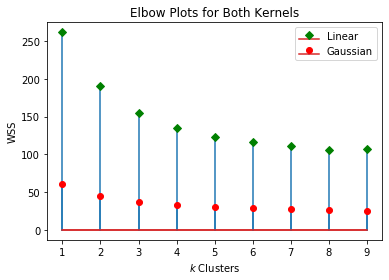

In [17]:
plt.figure()
xx = np.arange(1, 10, 1)
plt.stem(xx, wss_linear, label='Linear', markerfmt='gD')
plt.stem(xx, wss_gaussian, label='Gaussian', markerfmt='ro')
plt.xlabel('$k$ Clusters')
plt.ylabel('WSS')
plt.title("Elbow Plots for Both Kernels")
plt.legend()
#plt.stem(np.abs(np.diff(wss)))
plt.savefig("img/wss_kernel.pdf", filetype='pdf')

With the best k value, perform the clustering again.

In [18]:
kc = KKernelClustering(5, 1000, lambda x,y: k_gaussian(x,y, 1))
college_label  = kc.train(X)

Plot the data against the graduation rate (as an example.)

['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']


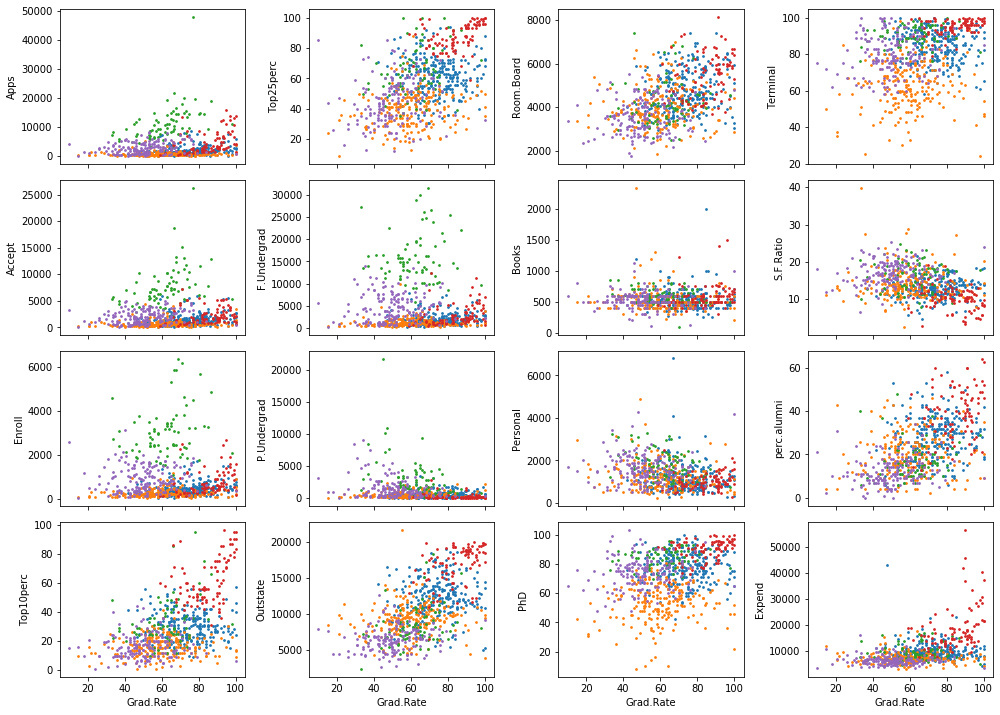

In [19]:
fig, ax = plt.subplots(figsize=(14,10), ncols=4, nrows=4, sharex=True)
d =16
names = list(college_df.columns)[2:]
print(names)
for i in range(0, 4):
    for j in range(0, 4):
        for k in range(0, 5):
            dims = [d, i+4*j]
            B = X * A
            XX = B[:, dims]
            if i == 3:
                ax[i][j].set_xlabel(names[dims[0]])
            ax[i][j].set_ylabel(names[dims[1]])
            ax[i][j].scatter(*XX[college_label == k, : ].T, s=3)
plt.tight_layout()
plt.savefig("img/grad_rate_college.pdf", format="pdf")

In [37]:
college_names = college_df["Unnamed: 0"].to_numpy()
college_cluster_df = pd.DataFrame.from_dict({"Cluster 1":list(college_names[college_label == 0]), 
              "Cluster 2":list(college_names[college_label == 1]), 
              "Cluster 3":list(college_names[college_label == 2]),
             "Cluster 4":list(college_names[college_label == 3]),
             "Cluster 5":list(college_names[college_label == 4])}, orient="index").transpose()
college_cluster_df

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
0,Albertson College,Adelphi University,Appalachian State University,Agnes Scott College,Abilene Christian University
1,Albertus Magnus College,Adrian College,Arizona State University Main campus,Allegheny College,Alaska Pacific University
2,Albion College,Alderson-Broaddus College,Auburn University-Main Campus,Amherst College,Angelo State University
3,Albright College,Alverno College,Baylor University,Bard College,Arkansas Tech University
4,Alfred University,American International College,Boston University,Barnard College,Belmont Abbey College
...,...,...,...,...,...
243,William Jewell College,None,None,None,None
244,Wilson College,None,None,None,None
245,Wittenberg University,None,None,None,None
246,Xavier University,None,None,None,None


Now, do it with a sigmoid kernel

In [99]:
kc = KKernelClustering(5, 1000, lambda x,y: k_tanh(x,y, 1, 1))
college_label  = kc.train(X)

['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']


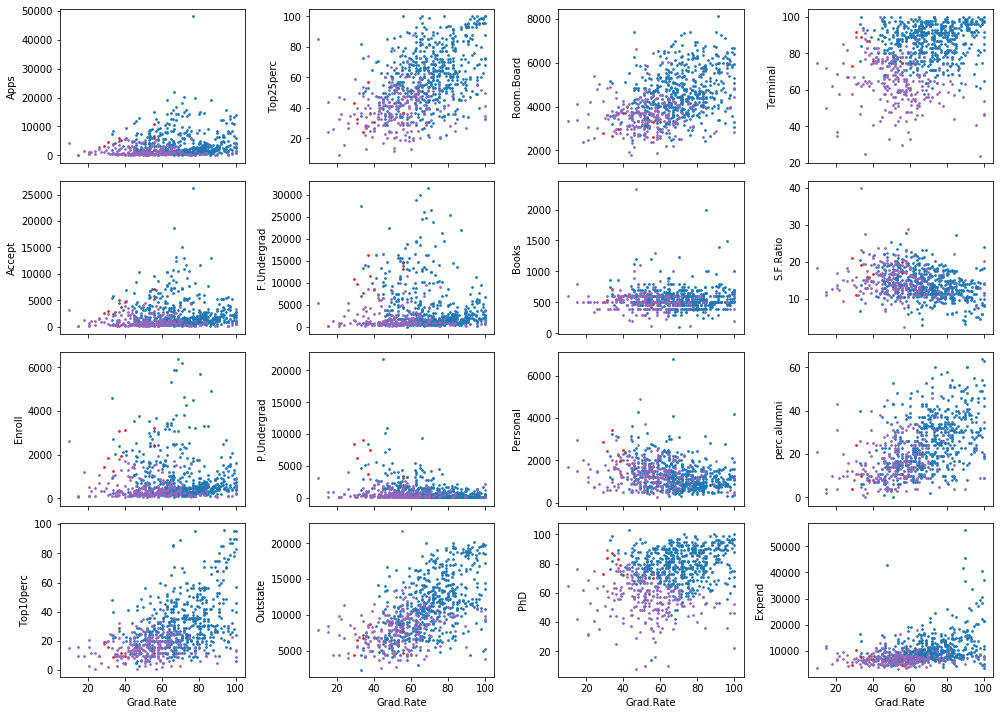

In [100]:
fig, ax = plt.subplots(figsize=(14,10), ncols=4, nrows=4, sharex=True)
d =16
names = list(college_df.columns)[2:]
print(names)
for i in range(0, 4):
    for j in range(0, 4):
        for k in range(0, 5):
            dims = [d, i+4*j]
            B = X * A
            XX = B[:, dims]
            if i == 3:
                ax[i][j].set_xlabel(names[dims[0]])
            ax[i][j].set_ylabel(names[dims[1]])
            ax[i][j].scatter(*XX[college_label == k, : ].T, s=3)
plt.tight_layout()
plt.savefig("img/grad_rate_college.pdf", format="pdf")